# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [2]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 140MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [83]:
import pandas as pd
from skimpy import skim
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
from skimpy import skim
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [67]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 147972 │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA ┃ NA % ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Busbreakdown_ID   │  0 │    0 │ 1288000 │ 43240 │ 1213000 │ 1250000 │ 1288000 │ 1325000 │ 1363000 │ ▇▇▇▇▇▇ │  │
│ │ Number_Of_Student │  0 │    0 │    3.59 │ 55.37 │       0 │       0 │       0 │       4 │    9007 │   ▇    │  │
│ │ s_On_The_Bus      │    │      │         │       │         │         │         │         │         │        │  │
│ └───────────────────┴────┴──────┴─────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ School_Year                        │           0 │         0 │                      1 │             147972 │  │
│ │ Run_Type                           │          89 │      0.06 │                    3.6 │             528679 │  │
│ │ Bus_No                             │           0 │         0 │                      1 │             149202 │  │
│ │ Route_Number                       │          88 │      0.06 │                      1 │             148558 │  │
│ │ Reason                             │         102 │      0.07 │                    1.9 │             284545 │  │
│ │ Schools_Serviced                   │           0 │         0 │                      1 │             150245 │  │
│ │ Occurred_On                        │           0 │         0 │                      3 │             443916 │  │
│ │ Created_On                         │           0 │         0 │                      3 │             443916 │  │
│ │ Boro                               │        6318 │      4.27 │                      1 │             152200 │  │
│ │ Bus_Company_Name                   │           0 │         0 │                    3.8 │             555452 │  │
│ │ How_Long_Delayed                   │       21630 │     14.62 │                    1.4 │             210879 │  │
│ │ Has_Contractor_Notified_Schools    │           0 │         0 │                      1 │             147972 │  │
│ │ Has_Contractor_Notified_Parents    │           0 │         0 │                      1 │             147972 │  │
│ │ Have_You_Alerted_OPT               │           0 │         0 │                      1 │             147972 │  │
│ │ Informed_On                        │           0 │  

In [6]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:

  for col in df:
    print (f"Unique in {col}")
    print( df[col].unique())
    print ('mode is',df[col].mode())
    print("------------------------------")


Unique in School_Year
['2015-2016' '2016-2017' '2017-2018' '2019-2020']
mode is 0    2016-2017
Name: School_Year, dtype: object
------------------------------
Unique in Busbreakdown_ID
[1224901 1225098 1215800 ... 1353044 1353045 1353046]
mode is 0         1212681
1         1212682
2         1212683
3         1212684
4         1212685
           ...   
147967    1362601
147968    1362602
147969    1362603
147970    1362604
147971    1362605
Name: Busbreakdown_ID, Length: 147972, dtype: int64
------------------------------
Unique in Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
mode is 0    Special Ed AM Run
Name: Run_Type, dtype: object
------------------------------
Unique in Bus_No
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
mode is 0    9354
Name: Bus_No, dtype: object
------------------------------
U

In [8]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


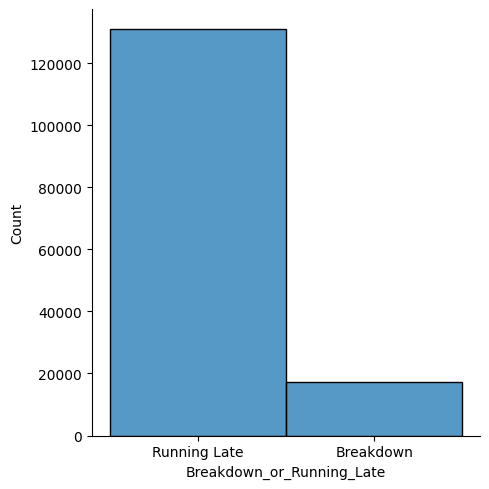

In [9]:
sns.displot(data=df, x="Breakdown_or_Running_Late")

# we most applay resample

In [11]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


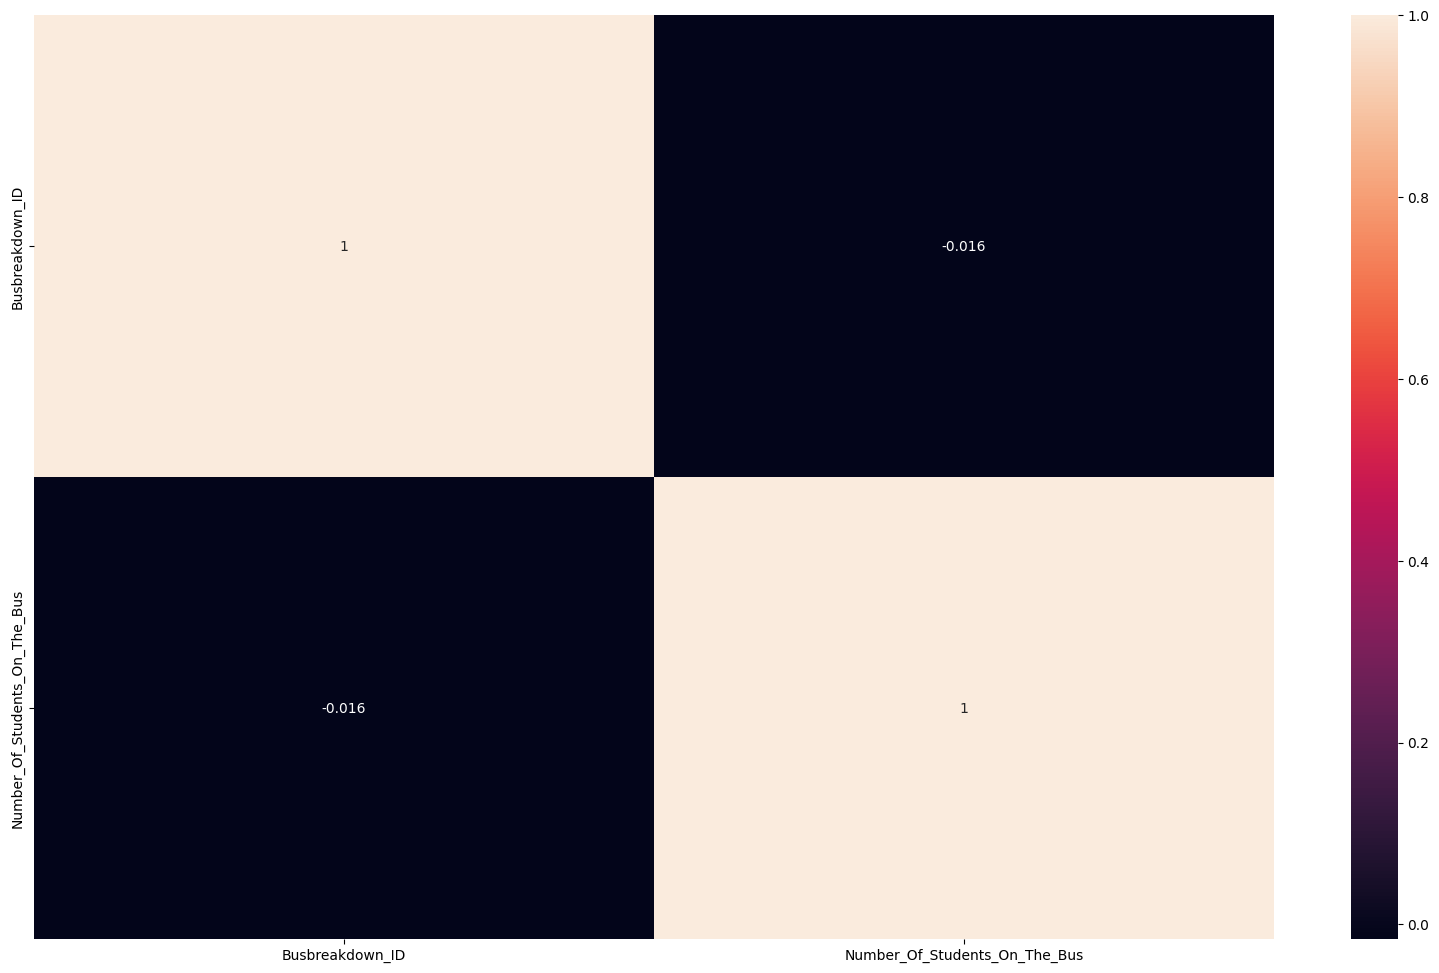

In [12]:
numeric_col = df.select_dtypes(include = ['number'])
numeric_matrix = numeric_col.corr()
plt.figure(figsize = (20,12))
sns.heatmap(numeric_matrix, annot = True)
plt.show()

In [14]:
#to find outlaier
import plotly.express as px
for col in df_balanced:
  fig=px.box(df_balanced ,y=col)
  fig.show()

NameError: name 'df_balanced' is not defined

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [68]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Breakdown_or_Running_Late'] == 'Running Late']
df_minority = df[df['Breakdown_or_Running_Late'] == 'Breakdown']

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample without replacement
                                   n_samples=len(df_minority),  # Match minority class size
                                   random_state=42)  # For reproducibility

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced['Breakdown_or_Running_Late'].value_counts())


Breakdown_or_Running_Late
Running Late    17115
Breakdown       17115
Name: count, dtype: int64


In [69]:
df_balanced.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
58781,2016-2017,1279458,Pre-K/EI,361,3,Heavy Traffic,C445,07/25/2016 07:45:00 AM,07/25/2016 07:48:00 AM,Bronx,...,15 MINS,8,Yes,Yes,No,07/25/2016 07:48:00 AM,NaN,07/25/2016 07:48:03 AM,Running Late,Pre-K
1322,2015-2016,1216245,Pre-K/EI,9,1,Heavy Traffic,C459,09/21/2015 07:38:00 AM,09/21/2015 07:39:00 AM,Bronx,...,25 MINUTES,5,Yes,Yes,No,09/21/2015 07:39:00 AM,NaN,09/21/2015 07:39:52 AM,Running Late,Pre-K
59822,2016-2017,1280540,Special Ed AM Run,5045,W941,Other,75841,08/03/2016 06:48:00 AM,08/03/2016 06:51:00 AM,Westchester,...,20 minutes,0,Yes,Yes,Yes,08/03/2016 06:51:00 AM,NaN,08/03/2016 06:51:08 AM,Running Late,School-Age
34350,2015-2016,1254354,Special Ed PM Run,2008,Q264,Other,28511,03/07/2016 02:55:00 PM,03/07/2016 02:59:00 PM,Queens,...,5 MIN,0,Yes,Yes,Yes,03/07/2016 02:59:00 PM,NaN,03/07/2016 03:27:16 PM,Running Late,School-Age
140983,2015-2016,1224461,Special Ed PM Run,96,Q603,Heavy Traffic,30540,10/23/2015 01:36:00 PM,10/23/2015 01:37:00 PM,Queens,...,@least 1/2,0,No,No,No,10/23/2015 01:37:00 PM,NaN,10/23/2015 01:37:03 PM,Running Late,School-Age


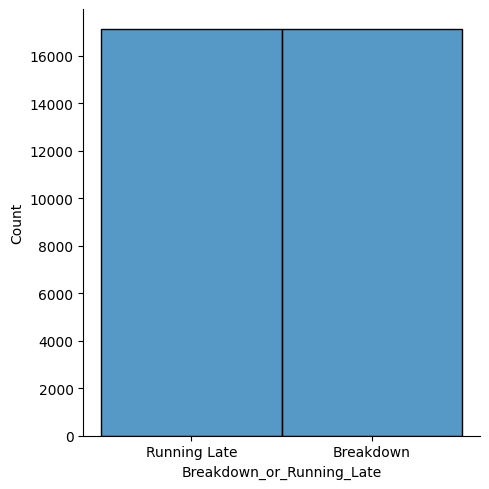

In [18]:
#here the data after resampling
sns.displot(data=df_balanced, x="Breakdown_or_Running_Late")



In [70]:
df=df_balanced.drop(['School_Year','Busbreakdown_ID','Occurred_On','Created_On','Number_Of_Students_On_The_Bus','Incident_Number','Informed_On','Last_Updated_On','How_Long_Delayed'],axis=1)

In [81]:
df=df.drop(['Route_Number'],axis=1)

In [72]:
  for col in df:
    print (f"Unique in {col}")
    print( df[col].unique())
    print ('mode is',df[col].mode())
    print("------------------------------")


Unique in Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'Special Ed PM Run' 'General Ed AM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'Project Read PM Run'
 'General Ed Field Trip' nan 'Project Read AM Run'
 'Project Read Field Trip']
mode is 0    Special Ed AM Run
Name: Run_Type, dtype: object
------------------------------
Unique in Bus_No
['361' '9' '5045' ... '0092' 'K9345' '3509']
mode is 0    213
1    357
Name: Bus_No, dtype: object
------------------------------
Unique in Route_Number
['3' '1' 'W941' ... '40 PM' 'K9345' 'BF29']
mode is 0    1
Name: Route_Number, dtype: object
------------------------------
Unique in Reason
['Heavy Traffic' 'Other' 'Mechanical Problem' 'Weather Conditions'
 'Delayed by School' 'Flat Tire' 'Won`t Start'
 'Late return from Field Trip' 'Problem Run' 'Accident' nan]
mode is 0    Heavy Traffic
Name: Reason, dtype: object
------------------------------
Unique in Schools_Serviced
['C445' 'C459' '75841' ... '29405,29827' 'C148' 'C121B']
mode is 0    12

In [82]:
df.dtypes

,0
Run_Type,object
Bus_No,object
Reason,object
Schools_Serviced,object
Boro,object
Bus_Company_Name,object
Has_Contractor_Notified_Schools,object
Has_Contractor_Notified_Parents,object
Have_You_Alerted_OPT,object
Breakdown_or_Running_Late,object


In [ ]:
df['Route_Number']=pd.to_numeric(df['Route_Number'],errors='coerce')

In [85]:
le=LabelEncoder()
for col in df:
        df[col] = le.fit_transform(df[col])

In [86]:
df.head()

,Run_Type,Bus_No,Reason,Schools_Serviced,Boro,Bus_Company_Name,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
58781,3,3514,3,3200,1,24,1,1,0,1,0
1322,3,6011,3,3203,1,24,1,1,0,1,0
59822,7,4317,6,3106,10,65,1,1,1,1,1
34350,9,1793,6,2675,7,66,1,1,1,1,1
140983,9,6146,3,2878,7,69,0,0,0,1,1


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [88]:
X=df.drop('Breakdown_or_Running_Late',axis=1)
y=df['Breakdown_or_Running_Late']

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train ,y_test= train_test_split(X,y,test_size= 0.3)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [92]:
from tensorflow.keras.layers import Dense

model  = Sequential()

In [93]:
model.add(Dense(units=6,input_dim= X_train.shape[1],activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [95]:
history=model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy' ])

## Training the Model
Train the ANN model using the training data.

In [98]:
import tensorflow as tf

earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [101]:
history=model.fit(X_train,y_train, batch_size=16, validation_split=0.2,epochs=20, callbacks=earlyStopping)

Epoch 1/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7278 - loss: 0.5534 - val_accuracy: 0.6286 - val_loss: 0.6450
Epoch 2/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7186 - loss: 0.5650 - val_accuracy: 0.7311 - val_loss: 0.5469
Epoch 3/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7203 - loss: 0.5565 - val_accuracy: 0.7256 - val_loss: 0.5531
Epoch 4/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7299 - loss: 0.5502 - val_accuracy: 0.6570 - val_loss: 0.6192
Epoch 5/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7241 - loss: 0.5557 - val_accuracy: 0.7384 - val_loss: 0.5424
Epoch 6/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7263 - loss: 0.5510 - val_accuracy: 0.7377 - val_loss: 0.5442
Epoch 7/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7252 - loss: 0.5529 - val_accuracy: 0.7292 - val_loss: 0.5591
Epoch 8/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7309 - loss: 0.5459 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [102]:
model.evaluate(X_test,y_test)

321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6956 - loss: 0.5623


[0.5599514842033386, 0.7009446024894714]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [103]:
pred= model.predict(X_test)
y_pred=(pred>0.5).astype(int).flatten()
y_pred=pd.DataFrame(y_pred)

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      5138
           1       0.77      0.57      0.66      5131

    accuracy                           0.70     10269
   macro avg       0.71      0.70      0.70     10269
weighted avg       0.71      0.70      0.70     10269



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

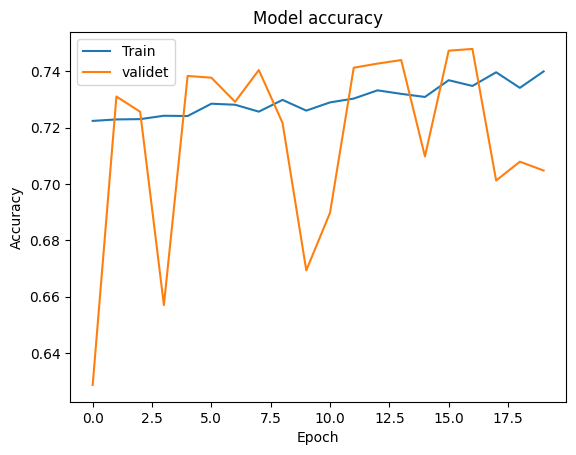

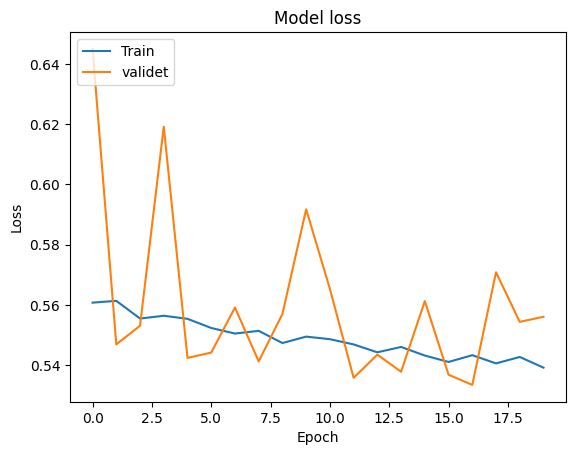

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validet'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validet'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [106]:
model_saved='model.h5'
model.save(model_saved)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

in data preprossing i use lapel encoding cose it is the more convent and fasts

> architecture is depending on the target value type and inpuot shape

>Training Process:
because i use Early stoping i dont care about the number of epoch but i make it limited becose the time

>Loss Function and Metrics:

the type of target is binery so i buld the model on it

>Regularization Techniques:

use erly stoping that shotdawn the model if thre is not ching


> turned the model to convent to  binary classficatuin


> visualization shouw Overfitting and Underfitting

### Answer Here: